In [1]:
from prophet import Prophet
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.tools.eval_measures import rmse
import statsmodels as sm
import datetime as dt
import seaborn as sns
import math
from pandas.plotting import autocorrelation_plot
!pip install pmdarima
import pmdarima as pmd
from sklearn.model_selection import train_test_split
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA

In [2]:
xls = pd.ExcelFile('7B21E009.xlsx')
exhibit = pd.read_excel(xls, 'Exhibit 1')
beer = pd.read_excel(xls, 'CraftBeer')
beer_pro = pd.read_excel(xls, 'CraftBeer')
whiskey = pd.read_excel(xls, 'Whiskey')
whiskey_pro = pd.read_excel(xls, 'Whiskey')
wine = pd.read_excel(xls, 'WhiteWine')
wine_pro = pd.read_excel(xls, 'WhiteWine')
ex = pd.ExcelFile('exhibit1.xlsx')
ex1 = pd.read_excel(ex)

In [3]:
beer.head()

Year  Month  Relative Interest
0  2010      1                  6
1  2010      2                  9
2  2010      3                 15
3  2010      4                 12
4  2010      5                 17

In [4]:
beer.dtypes

Year                 int64
Month                int64
Relative Interest    int64
dtype: object

In [5]:
cols=["Year","Month"]
beer['date'] =beer[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
beer.head()

Year  Month  Relative Interest    date
0  2010      1                  6  2010-1
1  2010      2                  9  2010-2
2  2010      3                 15  2010-3
3  2010      4                 12  2010-4
4  2010      5                 17  2010-5

In [6]:
beer = beer.rename(columns={
    'date': 'ds',
    'Relative Interest': 'y'
})
beer.head()

Year  Month   y      ds
0  2010      1   6  2010-1
1  2010      2   9  2010-2
2  2010      3  15  2010-3
3  2010      4  12  2010-4
4  2010      5  17  2010-5

In [7]:
beer['ds']=pd.to_datetime(beer['ds'])
#Convert the month column to datetime

In [8]:
beer.dtypes

Year              int64
Month             int64
y                 int64
ds       datetime64[ns]
dtype: object

In [9]:
df_beer=beer.drop(['Year','Month'], axis=1)

In [10]:
df_beer.head()

y         ds
0   6 2010-01-01
1   9 2010-02-01
2  15 2010-03-01
3  12 2010-04-01
4  17 2010-05-01

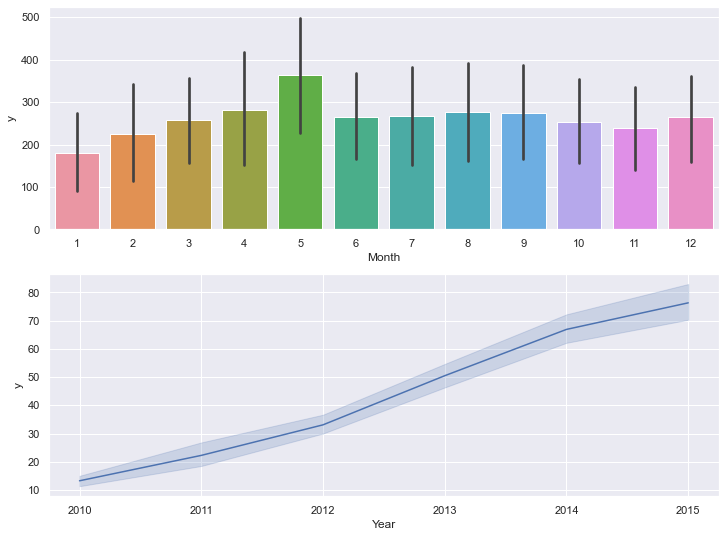

In [11]:
plt.figure(figsize=(12,9))
sns.set_theme()
plt.subplot(2,1,1)
sns.barplot(data=beer,x='Month',y='y',estimator=np.sum)
plt.subplot(2,1,2)
sns.lineplot(data=beer,x='Year',y='y')
plt.show()

Text(0.5, 1.0, 'Date vs Relative Interest For BEER')

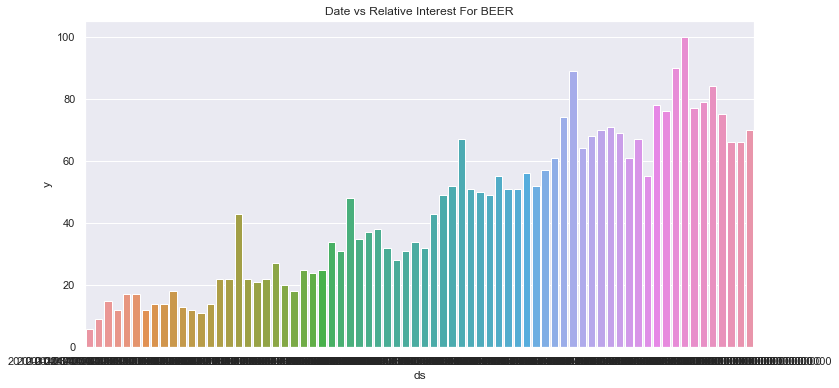

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(x="ds",y="y",data=df_beer)
plt.title('Date vs Relative Interest For BEER')

Text(0, 0.5, ' Beer Relative Interest')

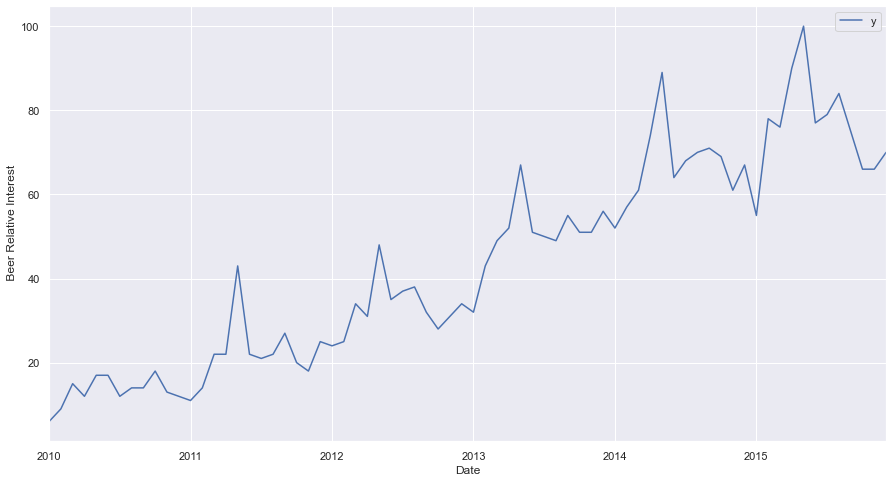

In [13]:
df_beer.set_index('ds').plot(figsize=(15, 8))
plt.xlabel('Date')
plt.ylabel(' Beer Relative Interest')

In [14]:
train_beer = df_beer[:60]
test_beer = df_beer[-12:]

In [15]:
train_beer.head()

y         ds
0   6 2010-01-01
1   9 2010-02-01
2  15 2010-03-01
3  12 2010-04-01
4  17 2010-05-01

In [16]:
train_beer.tail()

y         ds
55  70 2014-08-01
56  71 2014-09-01
57  69 2014-10-01
58  61 2014-11-01
59  67 2014-12-01

In [17]:
test_beer.head()

y         ds
60   55 2015-01-01
61   78 2015-02-01
62   76 2015-03-01
63   90 2015-04-01
64  100 2015-05-01

In [18]:
test_beer.tail()

y         ds
67  84 2015-08-01
68  75 2015-09-01
69  66 2015-10-01
70  66 2015-11-01
71  70 2015-12-01

In [19]:
m_beer = Prophet()
m_beer.fit(train_beer)

19:47:23 - cmdstanpy - INFO - Chain [1] start processing
19:47:24 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
future_beer = m_beer.make_future_dataframe(periods=12, freq='MS',include_history=False)
future_beer

ds
0  2015-01-01
1  2015-02-01
2  2015-03-01
3  2015-04-01
4  2015-05-01
5  2015-06-01
6  2015-07-01
7  2015-08-01
8  2015-09-01
9  2015-10-01
10 2015-11-01
11 2015-12-01

In [21]:
forecast_beer= m_beer.predict(future_beer)

In [22]:
print(forecast_beer.columns)

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')


In [23]:
forecast_beer[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds        yhat  yhat_lower  yhat_upper
0 2015-01-01   69.953541   65.735837   73.944734
1 2015-02-01   73.360390   69.484848   77.077928
2 2015-03-01   80.779250   76.857346   84.532147
3 2015-04-01   85.155719   81.313590   88.923817
4 2015-05-01  100.343183   96.571790  104.093404

In [24]:
forecast_beer[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
7  2015-08-01  83.427577   79.504154   87.596972
8  2015-09-01  88.350222   84.495684   92.146029
9  2015-10-01  85.841452   82.146370   89.499678
10 2015-11-01  80.372639   76.579577   84.190459
11 2015-12-01  86.070964   82.056671   90.103148

In [25]:
test_beer

y         ds
60   55 2015-01-01
61   78 2015-02-01
62   76 2015-03-01
63   90 2015-04-01
64  100 2015-05-01
65   77 2015-06-01
66   79 2015-07-01
67   84 2015-08-01
68   75 2015-09-01
69   66 2015-10-01
70   66 2015-11-01
71   70 2015-12-01

In [26]:
yhat_beer=forecast_beer['yhat']
yhat_beer

0      69.953541
1      73.360390
2      80.779250
3      85.155719
4     100.343183
5      83.080887
6      81.736248
7      83.427577
8      88.350222
9      85.841452
10     80.372639
11     86.070964
Name: yhat, dtype: float64

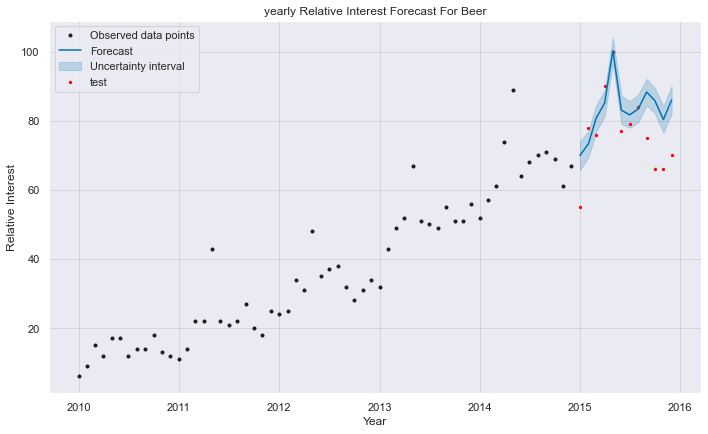

In [27]:
m_beer.plot(forecast_beer)
plt.scatter(test_beer['ds'], test_beer['y'], color = 'red', s = 5, label = 'test')
plt.title('yearly Relative Interest Forecast For Beer')
plt.xlabel('Year')
plt.ylabel('Relative Interest')
plt.legend()
plt.show()

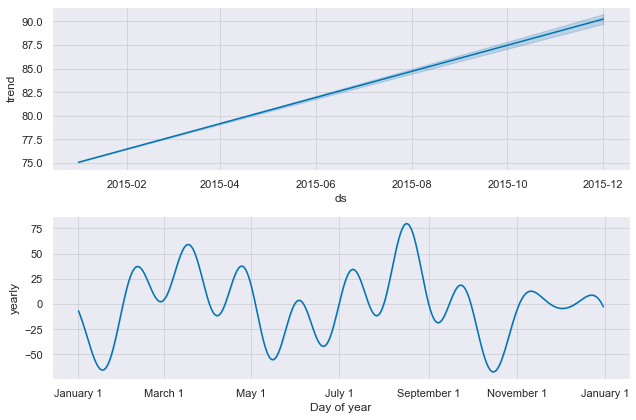

In [28]:
fig_components_beer = m_beer.plot_components(forecast_beer)

In [29]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m_beer, forecast_beer)

In [30]:
plot_components_plotly(m_beer, forecast_beer)


# whiskey

In [31]:
whiskey.head()

Year  Month  Relative Interest
0  2010      1                 41
1  2010      2                 42
2  2010      3                 44
3  2010      4                 41
4  2010      5                 39

In [32]:
whiskey.dtypes

Year                 int64
Month                int64
Relative Interest    int64
dtype: object

In [33]:
cols=["Year","Month"]
whiskey['date'] =whiskey[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
whiskey.head()

Year  Month  Relative Interest    date
0  2010      1                 41  2010-1
1  2010      2                 42  2010-2
2  2010      3                 44  2010-3
3  2010      4                 41  2010-4
4  2010      5                 39  2010-5

In [34]:
whiskey = whiskey.rename(columns={
    'date': 'ds',
    'Relative Interest': 'y'
})
whiskey.head()

Year  Month   y      ds
0  2010      1  41  2010-1
1  2010      2  42  2010-2
2  2010      3  44  2010-3
3  2010      4  41  2010-4
4  2010      5  39  2010-5

In [35]:
whiskey['ds']=pd.to_datetime(whiskey['ds'])
#Convert the month column to datetime

In [36]:
whiskey.dtypes

Year              int64
Month             int64
y                 int64
ds       datetime64[ns]
dtype: object

In [37]:
df_whiskey=whiskey.drop(['Year','Month'], axis=1)

In [38]:
df_whiskey.head()

y         ds
0  41 2010-01-01
1  42 2010-02-01
2  44 2010-03-01
3  41 2010-04-01
4  39 2010-05-01

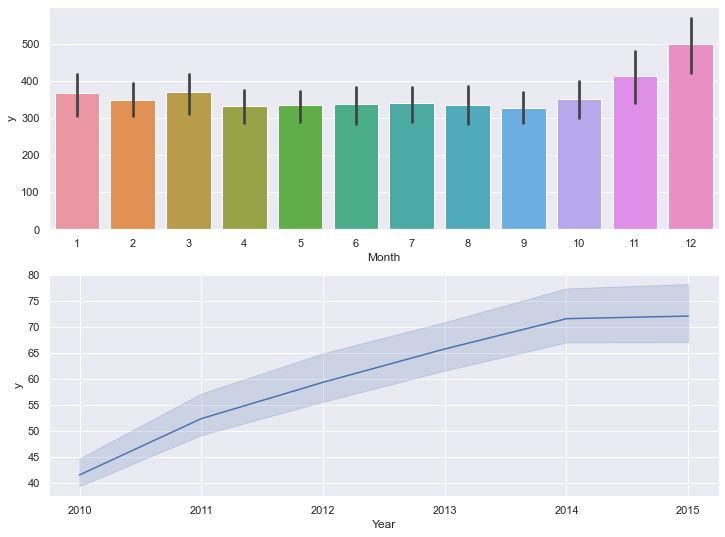

In [39]:
plt.figure(figsize=(12,9))
sns.set_theme()
plt.subplot(2,1,1)
sns.barplot(data=whiskey,x='Month',y='y',estimator=np.sum)
plt.subplot(2,1,2)
sns.lineplot(data=whiskey,x='Year',y='y')
plt.show()

Text(0.5, 1.0, 'Date vs Relative Interest For WHISKEY')

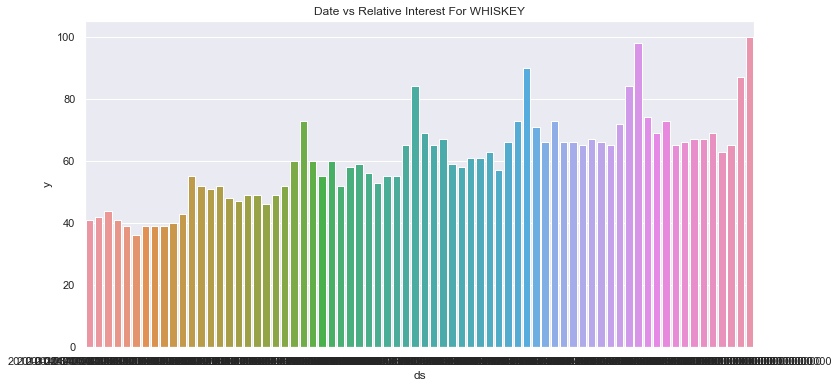

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(x="ds",y="y",data=df_whiskey)
plt.title('Date vs Relative Interest For WHISKEY')

Text(0, 0.5, ' Whiskey Relative Interest')

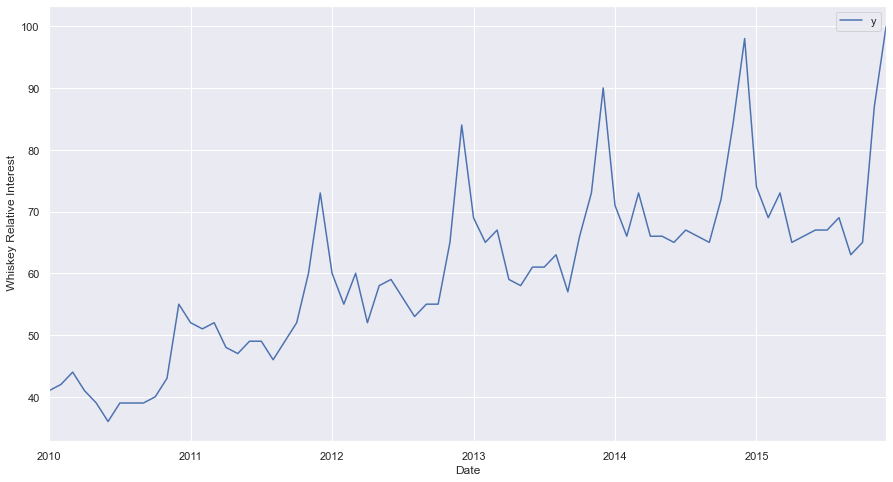

In [41]:
df_whiskey.set_index('ds').plot(figsize=(15, 8))
plt.xlabel('Date')
plt.ylabel(' Whiskey Relative Interest')

In [42]:
train_whiskey = df_whiskey[:60]
test_whiskey = df_whiskey[-12:]

In [43]:
train_whiskey.head()

y         ds
0  41 2010-01-01
1  42 2010-02-01
2  44 2010-03-01
3  41 2010-04-01
4  39 2010-05-01

In [44]:
test_whiskey.head()

y         ds
60  74 2015-01-01
61  69 2015-02-01
62  73 2015-03-01
63  65 2015-04-01
64  66 2015-05-01

In [45]:
test_whiskey

y         ds
60   74 2015-01-01
61   69 2015-02-01
62   73 2015-03-01
63   65 2015-04-01
64   66 2015-05-01
65   67 2015-06-01
66   67 2015-07-01
67   69 2015-08-01
68   63 2015-09-01
69   65 2015-10-01
70   87 2015-11-01
71  100 2015-12-01

In [46]:
m_wh = Prophet()
m_wh.fit(train_whiskey)

19:47:44 - cmdstanpy - INFO - Chain [1] start processing
19:47:46 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
future_wh = m_wh.make_future_dataframe(periods=12, freq='MS',include_history=False)
future_wh

ds
0  2015-01-01
1  2015-02-01
2  2015-03-01
3  2015-04-01
4  2015-05-01
5  2015-06-01
6  2015-07-01
7  2015-08-01
8  2015-09-01
9  2015-10-01
10 2015-11-01
11 2015-12-01

In [48]:
forecast_wh = m_wh.predict(future_wh)

In [49]:
print(forecast_wh.columns)

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')


In [50]:
forecast_wh[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
7  2015-08-01  73.596103   70.366910   76.579599
8  2015-09-01  74.222556   71.178066   77.471107
9  2015-10-01  78.729671   75.732390   81.980716
10 2015-11-01  85.919540   82.902175   89.141595
11 2015-12-01  97.761770   94.664556  100.925271

In [51]:
yhat_wh=forecast_wh['yhat']
yhat_wh

0     79.706554
1     76.671253
2     80.471621
3     76.309686
4     73.424909
5     73.008128
6     75.036857
7     73.596103
8     74.222556
9     78.729671
10    85.919540
11    97.761770
Name: yhat, dtype: float64

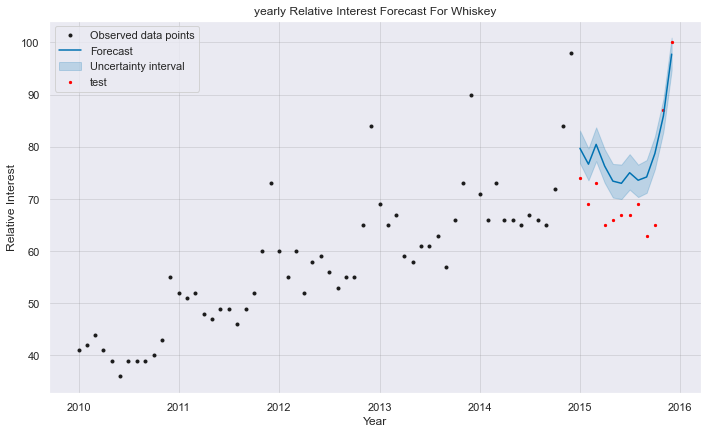

In [52]:
m_wh.plot(forecast_wh)
## Your code added here
plt.scatter(test_whiskey['ds'], test_whiskey['y'], color = 'red', s = 5, label = 'test')
plt.title('yearly Relative Interest Forecast For Whiskey')
plt.xlabel('Year')
plt.ylabel('Relative Interest')
plt.legend()
plt.show()

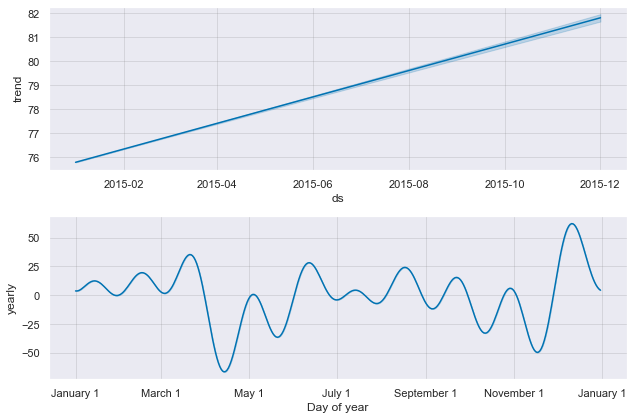

In [53]:
fig_components = m_wh.plot_components(forecast_wh)

In [54]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m_wh, forecast_wh)

In [55]:
plot_components_plotly(m_wh, forecast_wh)


# white wine

In [56]:
wine.head()

Year  Month  Relative Interest
0  2010      1                 54
1  2010      2                 54
2  2010      3                 58
3  2010      4                 52
4  2010      5                 61

In [57]:
wine.dtypes

Year                 int64
Month                int64
Relative Interest    int64
dtype: object

In [58]:
cols=["Year","Month"]
wine['date'] =wine[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
wine.head()

Year  Month  Relative Interest    date
0  2010      1                 54  2010-1
1  2010      2                 54  2010-2
2  2010      3                 58  2010-3
3  2010      4                 52  2010-4
4  2010      5                 61  2010-5

In [59]:
wine = wine.rename(columns={
    'date': 'ds',
    'Relative Interest': 'y'
})
wine.head()

Year  Month   y      ds
0  2010      1  54  2010-1
1  2010      2  54  2010-2
2  2010      3  58  2010-3
3  2010      4  52  2010-4
4  2010      5  61  2010-5

In [60]:
wine['ds']=pd.to_datetime(wine['ds'])
#Convert the month column to datetime

In [61]:
wine.dtypes

Year              int64
Month             int64
y                 int64
ds       datetime64[ns]
dtype: object

In [62]:
df_wine=wine.drop(['Year','Month'], axis=1)

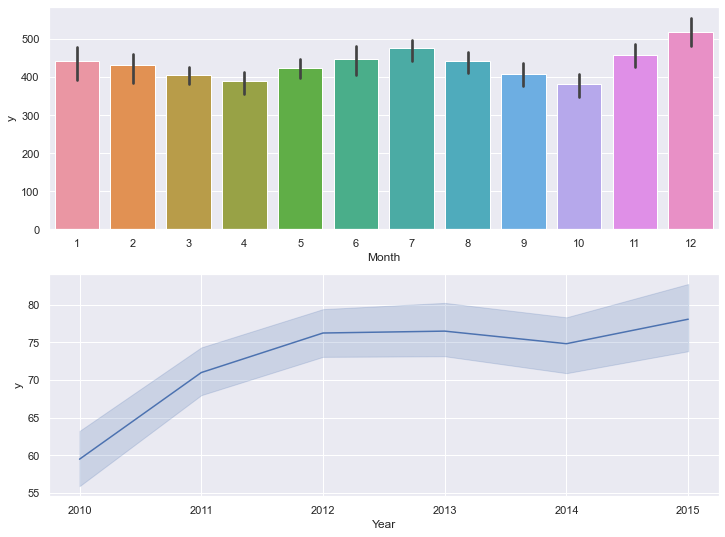

In [63]:
plt.figure(figsize=(12,9))
sns.set_theme()
plt.subplot(2,1,1)
sns.barplot(data=wine,x='Month',y='y',estimator=np.sum)
plt.subplot(2,1,2)
sns.lineplot(data=wine,x='Year',y='y')
plt.show()

Text(0.5, 1.0, 'Date vs Relative Interest For WHITE WHINE')

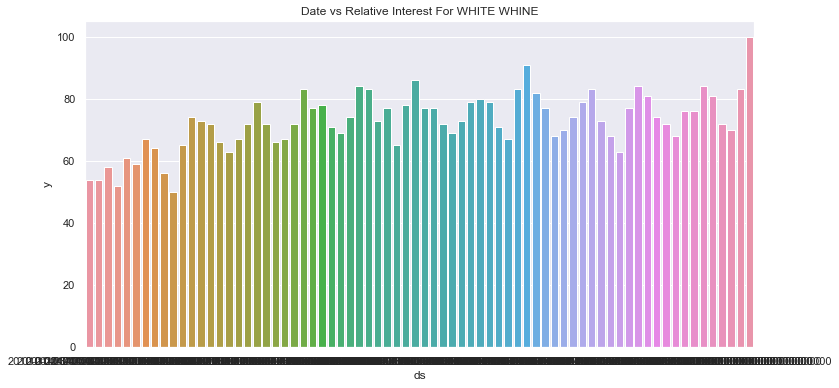

In [64]:
plt.figure(figsize=(12,6))
sns.barplot(x="ds",y="y",data=df_wine)
plt.title('Date vs Relative Interest For WHITE WHINE')

Text(0, 0.5, ' White Wine Relative Interest')

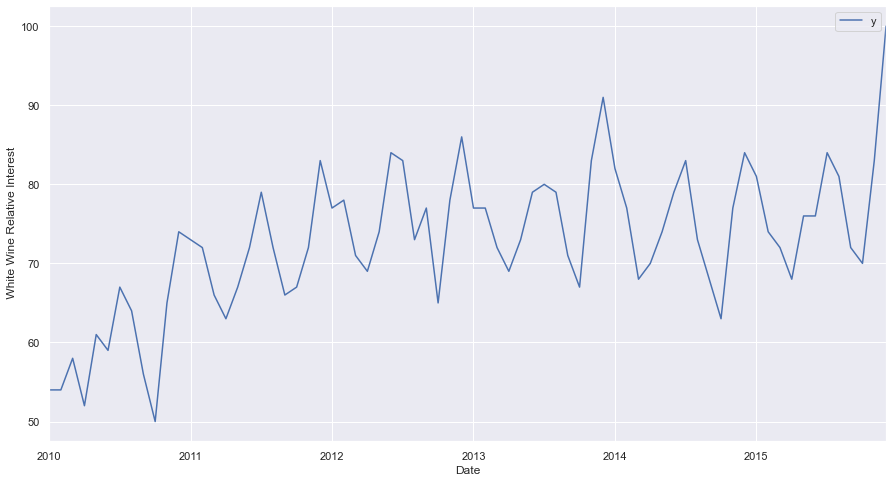

In [65]:
df_wine.set_index('ds').plot(figsize=(15, 8))
plt.xlabel('Date')
plt.ylabel(' White Wine Relative Interest')

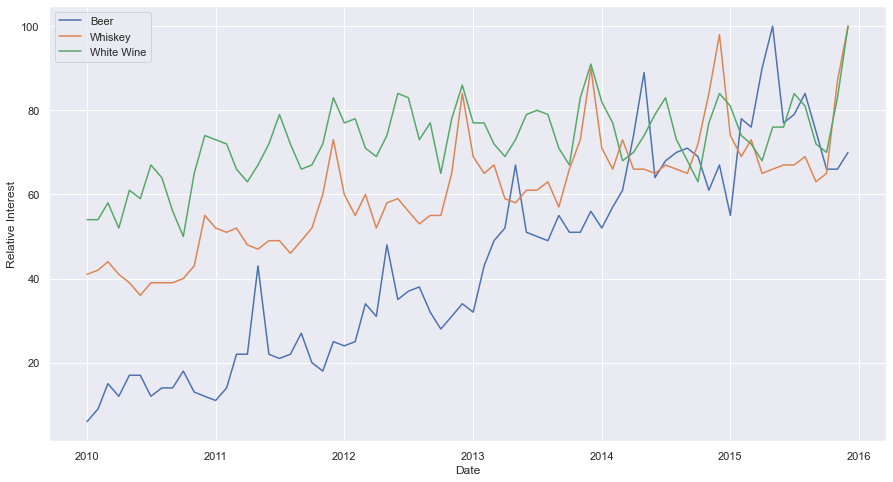

In [66]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'ds', y = 'y', data = beer, estimator = np.average,palette="husl", label="Beer")
sns.lineplot(x = 'ds', y = 'y', data = whiskey, estimator = np.average ,palette="husl", label="Whiskey")
sns.lineplot(x = 'ds', y = 'y', data = wine, estimator = np.average ,palette="husl", label="White Wine")
plt.xlabel('Date')
plt.ylabel('Relative Interest')
plt.show()

In [67]:
df_wine.head()

y         ds
0  54 2010-01-01
1  54 2010-02-01
2  58 2010-03-01
3  52 2010-04-01
4  61 2010-05-01

In [68]:
train_wine = df_wine[:60]
test_wine = df_wine[-12:]

In [69]:
train_wine.head()

y         ds
0  54 2010-01-01
1  54 2010-02-01
2  58 2010-03-01
3  52 2010-04-01
4  61 2010-05-01

In [70]:
test_wine

y         ds
60   81 2015-01-01
61   74 2015-02-01
62   72 2015-03-01
63   68 2015-04-01
64   76 2015-05-01
65   76 2015-06-01
66   84 2015-07-01
67   81 2015-08-01
68   72 2015-09-01
69   70 2015-10-01
70   83 2015-11-01
71  100 2015-12-01

In [71]:
m_w = Prophet()
m_w.fit(train_wine)

19:48:03 - cmdstanpy - INFO - Chain [1] start processing
19:48:03 - cmdstanpy - INFO - Chain [1] done processing


In [72]:
future_w = m_w.make_future_dataframe(periods=12, freq='MS',include_history=False)
future_w

ds
0  2015-01-01
1  2015-02-01
2  2015-03-01
3  2015-04-01
4  2015-05-01
5  2015-06-01
6  2015-07-01
7  2015-08-01
8  2015-09-01
9  2015-10-01
10 2015-11-01
11 2015-12-01

In [73]:
forecast_w = m_w.predict(future_w)

In [74]:
print(forecast_w.columns)

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')


In [75]:
forecast_w[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
7  2015-08-01  76.111148   73.477957   79.116789
8  2015-09-01  66.713288   63.880043   69.763049
9  2015-10-01  65.611858   62.746720   68.343193
10 2015-11-01  74.059494   71.031256   76.949519
11 2015-12-01  82.757385   79.533181   85.699025

In [76]:
yhat_w=forecast_w['yhat']
yhat_w

0     78.168626
1     76.722502
2     71.074486
3     68.093657
4     73.143461
5     74.713306
6     82.496304
7     76.111148
8     66.713288
9     65.611858
10    74.059494
11    82.757385
Name: yhat, dtype: float64

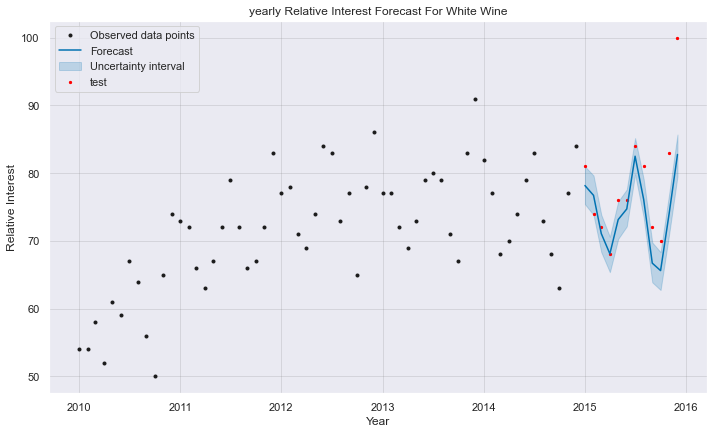

In [77]:
m_w.plot(forecast_w)
## Your code added here
plt.scatter(test_wine['ds'], test_wine['y'], color = 'red', s = 5, label = 'test')
plt.title('yearly Relative Interest Forecast For White Wine')
plt.xlabel('Year')
plt.ylabel('Relative Interest')
plt.legend()
plt.show()

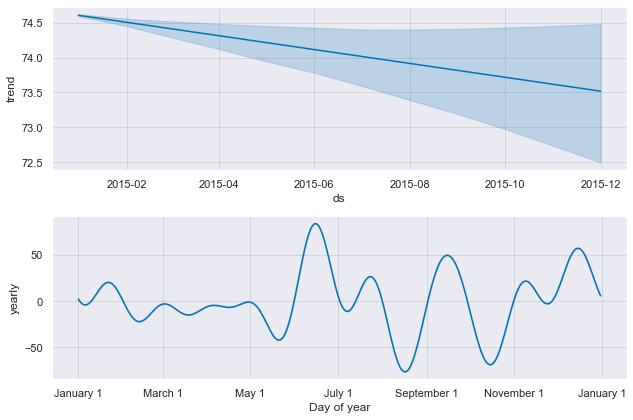

In [78]:
fig_components = m_w.plot_components(forecast_w)

In [79]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m_w, forecast_w)

In [80]:
plot_components_plotly(m_w, forecast_w)


# baseline methods beer

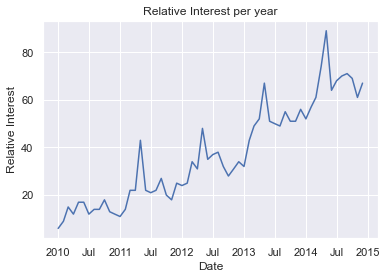

In [81]:

locator = mdates.AutoDateLocator(minticks = 10, maxticks = 15)
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator) 
plt.gca().xaxis.set_major_formatter(formatter)


plt.plot(train_beer['ds'], train_beer['y'])
plt.xlabel('Date')
plt.ylabel('Relative Interest')
plt.title('Relative Interest per year')
plt.show()



In [82]:
#Autocorrelation
#The autocorrelation (of the training data) can be plotted using the autocorrelation_plot function from pandas (https://machinelearningmastery.com/time-series-data-visualization-with-python/). Add a title to the following plot.

Text(0.5, 1.0, 'Autocorrelation Plot')

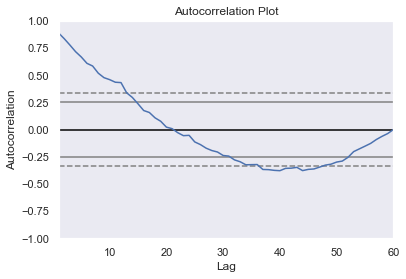

In [83]:
from pandas.plotting import autocorrelation_plot
data = np.array(train_beer['y'])
autocorrelation_plot(data)
## Your code to add a title here: 
plt.title('Autocorrelation Plot')

In [84]:
pred = pd.DataFrame(test_beer['ds'])
pred = pred.reset_index(drop = True)
h_max=12
m=12
T = len(train_beer)
yT = train_beer['y'][len(train_beer) - 1]
y1 = train_beer['y'][0]
pred['mean_baseline'] = train_beer['y'].mean()
pred['naive_baseline'] = yT
print(yT,y1,h_max,m)

67 6 12 12


In [85]:
pred_list = []
for h in range(1, h_max + 1): 
  k = math.floor((h - 1)/m)
  index = T + h - m * (k + 1)
  pred_list.append(beer['y'][index - 1])
pred['seasonal_naive_baseline'] = pred_list
pred_list

[52, 57, 61, 74, 89, 64, 68, 70, 71, 69, 61, 67]

In [86]:
drift_list = []
for h in range(1, h_max+1): 
  result = yT + h * ((yT-y1) / T-1)
  drift_list.append(result)
pred['drift_baseline'] = drift_list
drift_list

[67.01666666666667,
 67.03333333333333,
 67.05,
 67.06666666666666,
 67.08333333333333,
 67.1,
 67.11666666666666,
 67.13333333333333,
 67.15,
 67.16666666666667,
 67.18333333333334,
 67.2]

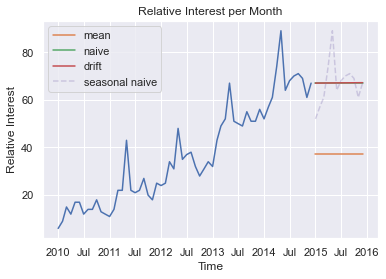

In [87]:
locator = mdates.AutoDateLocator(minticks = 10, maxticks = 15)
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator) 
plt.gca().xaxis.set_major_formatter(formatter)


plt.plot(train_beer['ds'], train_beer['y'])
plt.plot(pred['ds'], pred['mean_baseline'], label = 'mean')
plt.plot(pred['ds'], pred['naive_baseline'], label = 'naive')
plt.plot(pred['ds'], pred['drift_baseline'], label = 'drift')
plt.plot(pred['ds'], pred['seasonal_naive_baseline'], label = 'seasonal naive', linestyle = '--', alpha = 0.3)
plt.xlabel('Time')
plt.ylabel('Relative Interest')
plt.title('Relative Interest per Month')
plt.legend()
plt.show()

# baseline methods whiskey

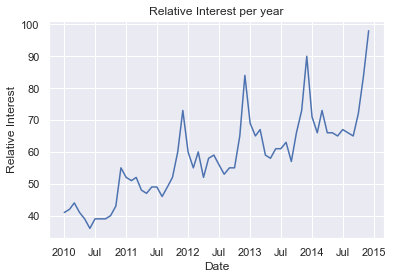

In [88]:
locator = mdates.AutoDateLocator(minticks = 10, maxticks = 15)
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator) 
plt.gca().xaxis.set_major_formatter(formatter)
plt.plot(train_whiskey['ds'], train_whiskey['y'])
plt.xlabel('Date')
plt.ylabel('Relative Interest')
plt.title('Relative Interest per year')
plt.show()


Text(0.5, 1.0, 'Autocorrelation Plot')

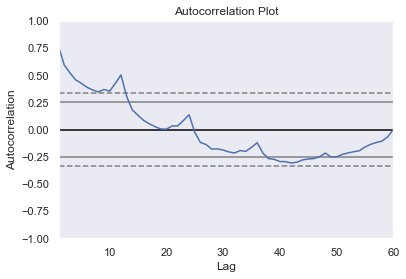

In [89]:
data_wh = np.array(train_whiskey['y'])
autocorrelation_plot(data_wh)
plt.title('Autocorrelation Plot')

In [90]:
pred_wh = pd.DataFrame(test_whiskey['ds'])
pred_wh= pred.reset_index(drop = True)
h_max_wh=12
m_wh=12
T_wh = len(train_whiskey)
yT_wh = train_whiskey['y'][len(train_whiskey) - 1]
y1_wh = train_whiskey['y'][0]
pred_wh['mean_baseline'] = train_whiskey['y'].mean()
pred_wh['naive_baseline'] = yT_wh
print(h_max_wh,m_wh,T_wh,yT_wh,y1_wh)

12 12 60 98 41


In [91]:
pred_list_wh = []
for h in range(1, h_max_wh + 1): 
  k = math.floor((h - 1)/m_wh)
  index = T_wh + h - m_wh * (k + 1)
  pred_list_wh.append(whiskey['y'][index - 1])
pred_wh['seasonal_naive_baseline'] = pred_list_wh
pred_list_wh

[71, 66, 73, 66, 66, 65, 67, 66, 65, 72, 84, 98]

In [92]:
drift_list_wh = []
for h in range(1, h_max_wh+1): 
  result = yT_wh + h * ((yT_wh-y1_wh) / T_wh-1)
  drift_list_wh.append(result)
pred_wh['drift_baseline'] = drift_list_wh
drift_list_wh

[97.95, 97.9, 97.85, 97.8, 97.75, 97.7, 97.65, 97.6, 97.55, 97.5, 97.45, 97.4]

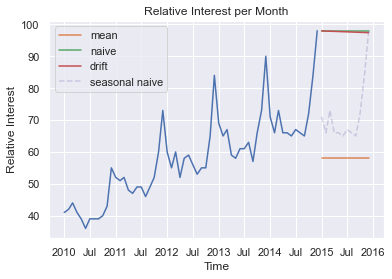

In [93]:
locator = mdates.AutoDateLocator(minticks = 10, maxticks = 15)
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator) 
plt.gca().xaxis.set_major_formatter(formatter)


plt.plot(train_whiskey['ds'], train_whiskey['y'])
plt.plot(pred_wh['ds'], pred_wh['mean_baseline'], label = 'mean')
plt.plot(pred_wh['ds'], pred_wh['naive_baseline'], label = 'naive')
plt.plot(pred_wh['ds'], pred_wh['drift_baseline'], label = 'drift')
plt.plot(pred_wh['ds'], pred_wh['seasonal_naive_baseline'], label = 'seasonal naive', linestyle = '--', alpha = 0.3)
plt.xlabel('Time')
plt.ylabel('Relative Interest')
plt.title('Relative Interest per Month')
plt.legend()
plt.show()

# baseline method white wine

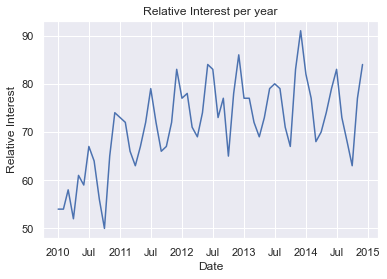

In [94]:
locator = mdates.AutoDateLocator(minticks = 10, maxticks = 15)
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator) 
plt.gca().xaxis.set_major_formatter(formatter)

plt.plot(train_wine['ds'], train_wine['y'])
plt.xlabel('Date')
plt.ylabel('Relative Interest')
plt.title('Relative Interest per year')
plt.show()


Text(0.5, 1.0, 'Autocorrelation Plot')

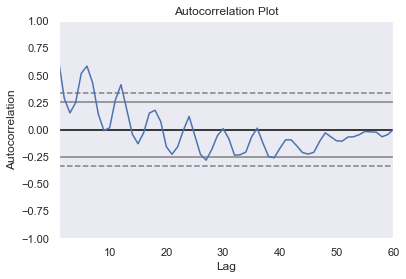

In [95]:
data_w = np.array(train_wine['y'])
autocorrelation_plot(data_w)
plt.title('Autocorrelation Plot')

In [96]:
pred_w = pd.DataFrame(test_wine['ds'])
pred_w= pred.reset_index(drop = True)
h_max_w=12*1
m_w=12*1
T_w = len(train_wine)
yT_w = train_wine['y'][len(train_wine) - 1]
y1_w = train_wine['y'][0]
pred_w['mean_baseline'] = train_wine['y'].mean()
pred_w['naive_baseline'] = yT_w
print(yT_w,y1_w,h_max_w,m_w)

84 54 12 12


In [97]:
pred_w['mean_baseline']

0     71.616667
1     71.616667
2     71.616667
3     71.616667
4     71.616667
5     71.616667
6     71.616667
7     71.616667
8     71.616667
9     71.616667
10    71.616667
11    71.616667
Name: mean_baseline, dtype: float64

In [98]:
pred_list_w = []
for h in range(1, h_max_w + 1): 
  k = math.floor((h - 1)/m_w)
  index = T_w + h - m_w * (k + 1)
  pred_list_w.append(wine['y'][index - 1])
pred_w['seasonal_naive_baseline'] = pred_list_w
pred_list_w

[82, 77, 68, 70, 74, 79, 83, 73, 68, 63, 77, 84]

In [99]:
drift_list_w = []
for h in range(1, h_max_w+1): 
  result = yT_w + h * ((yT_w-y1_w) / T_w-1)
  drift_list_w.append(result)
pred_w['drift_baseline'] = drift_list_w
drift_list_w

[83.5, 83.0, 82.5, 82.0, 81.5, 81.0, 80.5, 80.0, 79.5, 79.0, 78.5, 78.0]

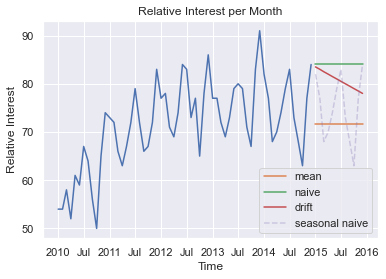

In [100]:
locator = mdates.AutoDateLocator(minticks = 10, maxticks = 15)
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator) 
plt.gca().xaxis.set_major_formatter(formatter)


plt.plot(train_wine['ds'], train_wine['y'])
plt.plot(pred_w['ds'], pred_w['mean_baseline'], label = 'mean')
plt.plot(pred_w['ds'], pred_w['naive_baseline'], label = 'naive')
plt.plot(pred_w['ds'], pred_w['drift_baseline'], label = 'drift')
plt.plot(pred_w['ds'], pred_w['seasonal_naive_baseline'], label = 'seasonal naive', linestyle = '--', alpha = 0.3)
plt.xlabel('Time')
plt.ylabel('Relative Interest')
plt.title('Relative Interest per Month')
plt.legend()
plt.show()

# arima_beer

In [101]:
cols=["Year","Month"]
beer_pro['date'] =beer_pro[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
beer_pro.head()

Year  Month  Relative Interest    date
0  2010      1                  6  2010-1
1  2010      2                  9  2010-2
2  2010      3                 15  2010-3
3  2010      4                 12  2010-4
4  2010      5                 17  2010-5

In [102]:
beer_pro = beer_pro.rename(columns={
    'date': 'ds_pro',
    'Relative Interest': 'y_pro'
})
beer_pro.head()

Year  Month  y_pro  ds_pro
0  2010      1      6  2010-1
1  2010      2      9  2010-2
2  2010      3     15  2010-3
3  2010      4     12  2010-4
4  2010      5     17  2010-5

In [103]:
beer_pro.dtypes

Year       int64
Month      int64
y_pro      int64
ds_pro    object
dtype: object

In [104]:
beer_pro['ds_pro']=pd.to_datetime(beer_pro['ds_pro'])
#Convert the month column to datetime

In [105]:
beer_pro.dtypes

Year               int64
Month              int64
y_pro              int64
ds_pro    datetime64[ns]
dtype: object

In [106]:
beer_pro.set_index('ds_pro',inplace=True)
#Set the index of the Month 

In [107]:
df_beer_pro=beer_pro.drop(['Year','Month'], axis=1)

In [108]:
df_beer_pro.head()

y_pro
ds_pro           
2010-01-01      6
2010-02-01      9
2010-03-01     15
2010-04-01     12
2010-05-01     17

Text(0, 0.5, ' Beer Relative Interest')

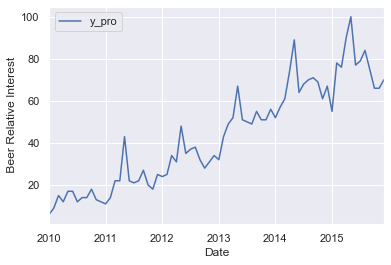

In [109]:
df_beer_pro.plot()
plt.xlabel('Date')
plt.ylabel(' Beer Relative Interest')

In [110]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df_beer_pro)


(0.01, False)

In [111]:

train_beer_pro = df_beer_pro[:60]
test_beer_pro = df_beer_pro[-12:]



In [112]:
train_beer_pro.head()

y_pro
ds_pro           
2010-01-01      6
2010-02-01      9
2010-03-01     15
2010-04-01     12
2010-05-01     17

In [113]:
test_beer_pro

y_pro
ds_pro           
2015-01-01     55
2015-02-01     78
2015-03-01     76
2015-04-01     90
2015-05-01    100
2015-06-01     77
2015-07-01     79
2015-08-01     84
2015-09-01     75
2015-10-01     66
2015-11-01     66
2015-12-01     70

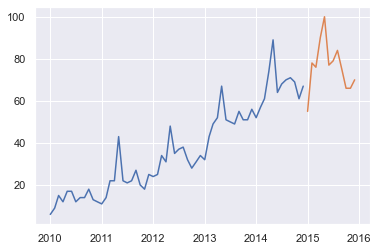

In [114]:
plt.plot(train_beer_pro)
plt.plot(test_beer_pro)

In [115]:
arima_model_beer =  auto_arima(train_beer_pro,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=309.304, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=298.555, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=290.143, Time=0.21 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=295.529, Time=0.10 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=291.222, Time=0.25 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=290.376, Time=0.47 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=289.989, Time=0.17 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=290.359, Time=0.33 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=2.26 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=302.949, Time=0.12 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=291.287, Time=0.26 sec
 ARIMA(0,1,2)(1,1,0)[12]             : AIC=291.085, Time=0.24 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=293.008, Time=0.50 sec
 ARIMA(0,1,1)(1,1,0)[12] intercept   : AIC=inf, Time=0.71 sec

Best model:  ARIMA(0,1,1)(1,1,0)[12]    

In [116]:
arima_model_beer.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   60
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                -141.994
Date:                             Tue, 28 Mar 2023   AIC                            289.989
Time:                                     19:48:23   BIC                            295.539
Sample:                                 01-01-2010   HQIC                           292.078
                                      - 12-01-2014                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7329      0.120     -6.105      0.000      -0.968      -0.498
ar.S.L12      -0.4767      0.135     -3.542      0.000      -0.741      -0.213
sigma2        22.6856      4.427      5.124      0.000      14.008      31.363
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 3.79
Prob(Q):                              0.76   Prob(JB):                         0.15
Heteroskedasticity (H):               0.75   Skew:                             0.43
Prob(H) (two-sided):                  0.56   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [117]:
prediction_beer = pd.DataFrame(arima_model_beer.predict(n_periods = 12),index=test_beer_pro.index)
prediction_beer.columns = ['predicted_interest']
prediction_beer

predicted_interest
ds_pro                        
2015-01-01           66.295244
2015-02-01           74.155719
2015-03-01           79.109210
2015-04-01           87.341753
2015-05-01          102.341753
2015-06-01           81.632464
2015-07-01           83.248736
2015-08-01           83.818498
2015-09-01           87.202227
2015-10-01           84.248736
2015-11-01           80.062702
2015-12-01           85.585956

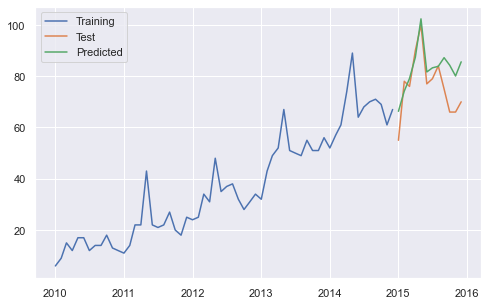

In [118]:
plt.figure(figsize=(8,5))
plt.plot(train_beer_pro,label="Training")
plt.plot(test_beer_pro,label="Test")
plt.plot(prediction_beer,label="Predicted")
plt.legend(loc = 'upper left')
plt.show()

In [119]:
r2_score(test_beer_pro,prediction_beer)

0.2619770580428742

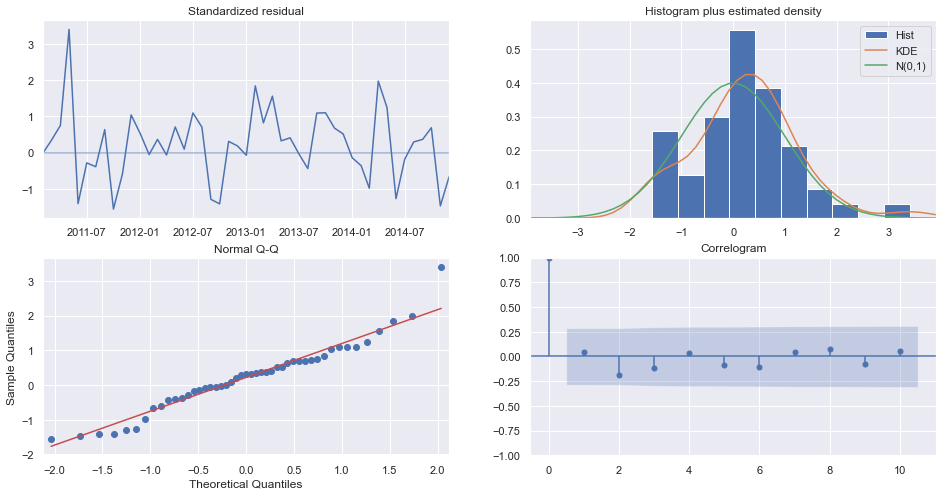

In [120]:
fig = arima_model_beer.plot_diagnostics(figsize=(16,8))

In [121]:
print('Mean baseline MSE: ', mean_squared_error(pred['mean_baseline'], test_beer['y']))
print('Naive baseline MSE: ', mean_squared_error(pred['naive_baseline'], test_beer['y']))
print('Naive seasonal baseline MSE : ', mean_squared_error(pred['seasonal_naive_baseline'], test_beer['y']))
print('Drift baseline MSE: ', mean_squared_error(pred['drift_baseline'], test_beer['y']))
print('Prophet MSE: ', mean_squared_error(yhat_beer, test_beer['y']))
print('Auto Arima Model :', mean_squared_error(prediction_beer, test_beer_pro['y_pro']))

Mean baseline MSE:  1658.6399999999996
Naive baseline MSE:  214.33333333333334
Naive seasonal baseline MSE :  133.08333333333334
Drift baseline MSE:  212.51226851851865
Prophet MSE:  114.4260530971335
Auto Arima Model : 93.89291872676768


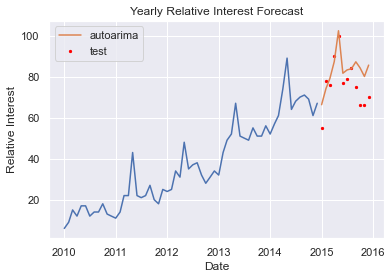

In [122]:
plt.plot(train_beer['ds'], train_beer['y'])
plt.plot(prediction_beer, label = 'autoarima')
plt.scatter(test_beer['ds'], test_beer['y'], color = 'red', s = 5, label = 'test')
plt.title('Yearly Relative Interest Forecast')
plt.xlabel('Date')
plt.ylabel('Relative Interest')
plt.legend()
plt.show()

In [123]:
full_autoarima_model_beer = arima_model_beer.fit(df_beer_pro['y_pro'])
future = 12*1 
forecast, confidence_intervals = full_autoarima_model_beer.predict(n_periods = future, return_conf_int = True)

In [124]:
final_date_beer = df_beer['ds'][len(df_beer['ds']) - 1]
future_dates_beer = pd.date_range("2016-1", periods = future, freq = 'MS')

C:\Users\SINA\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.



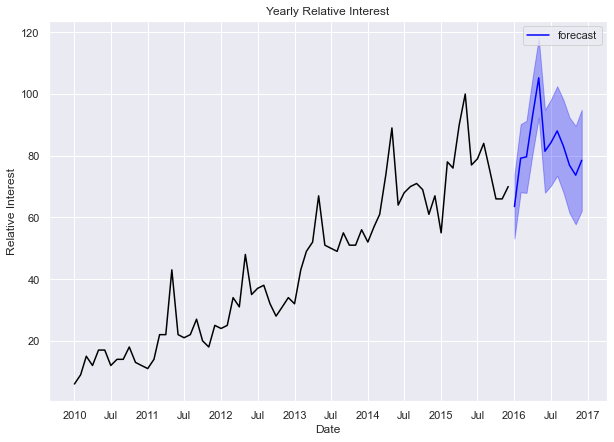

In [125]:
import matplotlib.dates as mdates
plt.figure(figsize = (10,7))
locator = mdates.AutoDateLocator(minticks = 10, maxticks = 15)
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator) 
plt.gca().xaxis.set_major_formatter(formatter)

plt.plot(df_beer['ds'], df_beer['y'], c = 'black')
plt.plot(future_dates_beer, forecast, c = 'blue', label = 'forecast')
plt.fill_between(future_dates_beer, confidence_intervals[:,0], confidence_intervals[:,1], color = 'blue', alpha = 0.3)
plt.title('Yearly Relative Interest')
plt.xlabel('Date')
plt.ylabel('Relative Interest')
plt.legend()
plt.show()

# arima_whiskey

In [126]:
cols=["Year","Month"]
whiskey_pro['date'] =whiskey_pro[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
whiskey_pro.head()

Year  Month  Relative Interest    date
0  2010      1                 41  2010-1
1  2010      2                 42  2010-2
2  2010      3                 44  2010-3
3  2010      4                 41  2010-4
4  2010      5                 39  2010-5

In [127]:
whiskey_pro = whiskey_pro.rename(columns={
    'date': 'ds_pro',
    'Relative Interest': 'y_pro'
})
whiskey_pro.head()

Year  Month  y_pro  ds_pro
0  2010      1     41  2010-1
1  2010      2     42  2010-2
2  2010      3     44  2010-3
3  2010      4     41  2010-4
4  2010      5     39  2010-5

In [128]:
whiskey_pro.dtypes

Year       int64
Month      int64
y_pro      int64
ds_pro    object
dtype: object

In [129]:
whiskey_pro['ds_pro']=pd.to_datetime(whiskey_pro['ds_pro'])
#Convert the month column to datetime

In [130]:
whiskey_pro.dtypes

Year               int64
Month              int64
y_pro              int64
ds_pro    datetime64[ns]
dtype: object

In [131]:
whiskey_pro.set_index('ds_pro',inplace=True)
#Set the index of the Month 

In [132]:
df_whiskey_pro=whiskey_pro.drop(['Year','Month'], axis=1)

In [133]:
df_whiskey_pro.head()

y_pro
ds_pro           
2010-01-01     41
2010-02-01     42
2010-03-01     44
2010-04-01     41
2010-05-01     39

Text(0, 0.5, ' Whiskey Relative Interest')

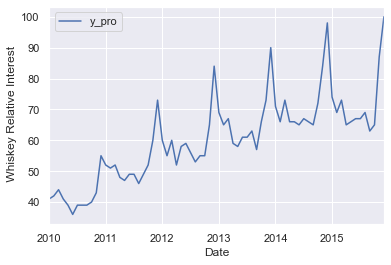

In [134]:
df_whiskey_pro.plot()
plt.xlabel('Date')
plt.ylabel(' Whiskey Relative Interest')

In [135]:

from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df_whiskey_pro)


(0.013742161769194742, False)

In [136]:
train_whiskey_pro = df_whiskey_pro[:60]
test_whiskey_pro = df_whiskey_pro[-12:]



In [137]:
train_whiskey_pro.head()

y_pro
ds_pro           
2010-01-01     41
2010-02-01     42
2010-03-01     44
2010-04-01     41
2010-05-01     39

In [138]:
test_whiskey_pro

y_pro
ds_pro           
2015-01-01     74
2015-02-01     69
2015-03-01     73
2015-04-01     65
2015-05-01     66
2015-06-01     67
2015-07-01     67
2015-08-01     69
2015-09-01     63
2015-10-01     65
2015-11-01     87
2015-12-01    100

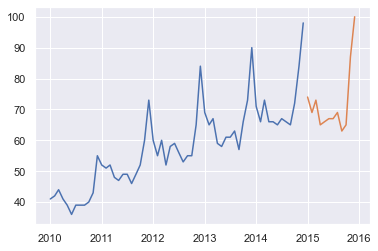

In [139]:
plt.plot(train_whiskey_pro)
plt.plot(test_whiskey_pro)

In [140]:
arima_model_wh =  auto_arima(train_whiskey_pro,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=264.999, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=262.819, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=258.143, Time=0.15 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=257.741, Time=0.07 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=257.934, Time=0.13 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=259.923, Time=0.26 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=255.114, Time=0.10 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=255.131, Time=0.20 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=255.173, Time=0.26 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=257.118, Time=0.33 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=263.076, Time=0.06 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=256.898, Time=0.20 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=257.034, Time=0.18 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=255.620, Time=0.08 sec
 ARIMA(2,1,0)(0,1,0)[12]         

In [141]:
arima_model_wh.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                -124.557
Date:                             Tue, 28 Mar 2023   AIC                            255.114
Time:                                     19:48:32   BIC                            260.665
Sample:                                 01-01-2010   HQIC                           257.203
                                      - 12-01-2014                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3436      0.165      2.083      0.037       0.020       0.667
ma.L1         -0.9098      0.086    -10.561      0.000      -1.079      -0.741
sigma2        11.4532      2.758      4.153      0.000       6.048      16.859
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.56
Prob(Q):                              0.97   Prob(JB):                         0.76
Heteroskedasticity (H):               0.81   Skew:                             0.10
Prob(H) (two-sided):                  0.68   Kurtosis:                         2.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [142]:
prediction_wh = pd.DataFrame(arima_model_wh.predict(n_periods = 12),index=test_whiskey_pro.index)
prediction_wh.columns = ['predicted_interest']
prediction_wh

predicted_interest
ds_pro                        
2015-01-01           78.127462
2015-02-01           72.827679
2015-03-01           79.724681
2015-04-01           72.689293
2015-05-01           72.677135
2015-06-01           71.672957
2015-07-01           73.671522
2015-08-01           72.671029
2015-09-01           71.670860
2015-10-01           78.670801
2015-11-01           90.670781
2015-12-01          104.670775

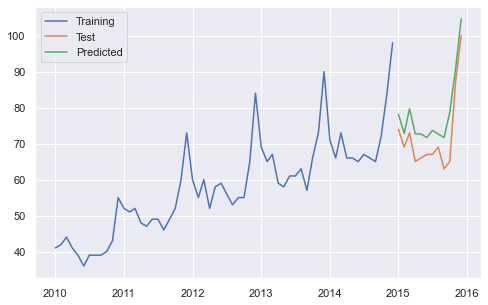

In [143]:
plt.figure(figsize=(8,5))
plt.plot(train_whiskey_pro,label="Training")
plt.plot(test_whiskey_pro,label="Test")
plt.plot(prediction_wh,label="Predicted")
plt.legend(loc = 'upper left')
plt.show()

In [144]:
r2_score(test_whiskey_pro,prediction_wh)

0.5698988658770421

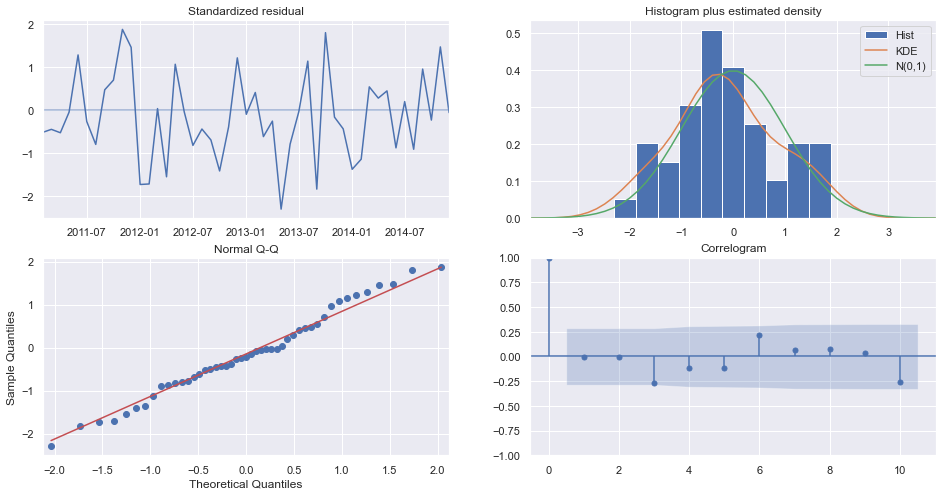

In [145]:
fig = arima_model_wh.plot_diagnostics(figsize=(16,8))

In [146]:
print('Mean baseline MSE: ', mean_squared_error(pred['mean_baseline'], test_whiskey['y']))
print('Naive baseline MSE: ', mean_squared_error(pred['naive_baseline'], test_whiskey['y']))
print('Naive seasonal baseline MSE : ', mean_squared_error(pred['seasonal_naive_baseline'], test_whiskey['y']))
print('Drift baseline MSE: ', mean_squared_error(pred['drift_baseline'], test_whiskey['y']))
print('Prophet MSE: ', mean_squared_error(yhat_wh, test_whiskey['y']))
print('Auto Arima Model :', mean_squared_error(prediction_wh, test_whiskey_pro['y_pro']))

Mean baseline MSE:  1324.9233333333332
Naive baseline MSE:  133.91666666666666
Naive seasonal baseline MSE :  269.8333333333333
Drift baseline MSE:  132.28726851851852
Prophet MSE:  64.3929833803603
Auto Arima Model : 46.483777433024954


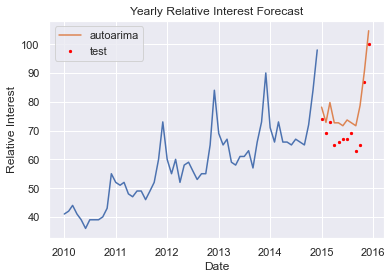

In [147]:
plt.plot(train_whiskey['ds'], train_whiskey['y'])
plt.plot(prediction_wh, label = 'autoarima')
plt.scatter(test_whiskey['ds'], test_whiskey['y'], color = 'red', s = 5, label = 'test')
plt.title('Yearly Relative Interest Forecast')
plt.xlabel('Date')
plt.ylabel('Relative Interest')
plt.legend()
plt.show()

In [148]:
full_autoarima_model_wh = arima_model_wh.fit(df_whiskey_pro['y_pro'])
future = 12*1 
forecast, confidence_intervals = full_autoarima_model_wh.predict(n_periods = future, return_conf_int = True)

In [149]:
final_date_wh = df_whiskey['ds'][len(df_whiskey['ds']) - 1]
future_dates_wh = pd.date_range("2016-1", periods = future, freq = 'MS')

C:\Users\SINA\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.



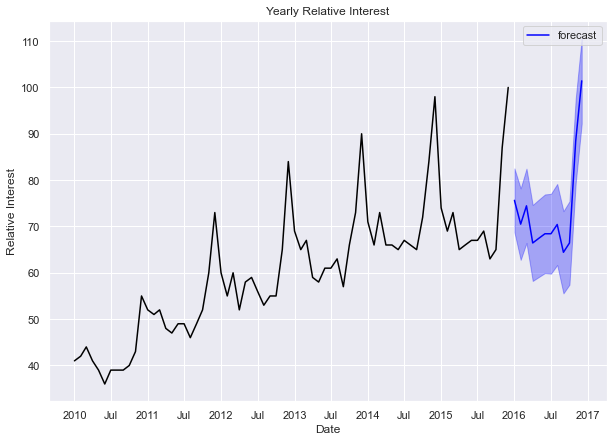

In [150]:
import matplotlib.dates as mdates
plt.figure(figsize = (10,7))
locator = mdates.AutoDateLocator(minticks = 10, maxticks = 15)
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator) 
plt.gca().xaxis.set_major_formatter(formatter)

plt.plot(df_whiskey['ds'], df_whiskey['y'], c = 'black')
plt.plot(future_dates_wh, forecast, c = 'blue', label = 'forecast')
plt.fill_between(future_dates_wh, confidence_intervals[:,0], confidence_intervals[:,1], color = 'blue', alpha = 0.3)
plt.title('Yearly Relative Interest')
plt.xlabel('Date')
plt.ylabel('Relative Interest')
plt.legend()
plt.show()

# arima_white whine

In [151]:
cols=["Year","Month"]
wine_pro['date'] =wine_pro[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
wine_pro.head()

Year  Month  Relative Interest    date
0  2010      1                 54  2010-1
1  2010      2                 54  2010-2
2  2010      3                 58  2010-3
3  2010      4                 52  2010-4
4  2010      5                 61  2010-5

In [152]:
wine_pro = wine_pro.rename(columns={
    'date': 'ds_pro',
    'Relative Interest': 'y_pro'
})
wine_pro.head()

Year  Month  y_pro  ds_pro
0  2010      1     54  2010-1
1  2010      2     54  2010-2
2  2010      3     58  2010-3
3  2010      4     52  2010-4
4  2010      5     61  2010-5

In [153]:
wine_pro.dtypes

Year       int64
Month      int64
y_pro      int64
ds_pro    object
dtype: object

In [154]:
wine_pro['ds_pro']=pd.to_datetime(wine_pro['ds_pro'])
#Convert the month column to datetime

In [155]:
wine_pro.dtypes

Year               int64
Month              int64
y_pro              int64
ds_pro    datetime64[ns]
dtype: object

In [156]:
wine_pro.set_index('ds_pro',inplace=True)
#Set the index of the Month 

In [157]:
df_wine_pro=wine_pro.drop(['Year','Month'], axis=1)

In [158]:
df_wine_pro.head()

y_pro
ds_pro           
2010-01-01     54
2010-02-01     54
2010-03-01     58
2010-04-01     52
2010-05-01     61

Text(0, 0.5, ' White Wine Relative Interest')

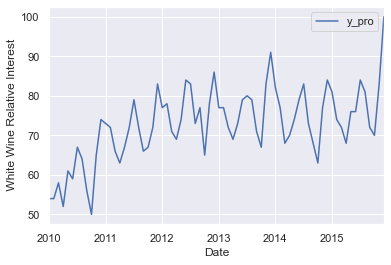

In [159]:
df_wine_pro.plot()
plt.xlabel('Date')
plt.ylabel(' White Wine Relative Interest')

In [160]:

from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df_wine_pro)



(0.3868087997879217, True)

In [161]:
#Spliting the dataset into train and test
train_wine_pro = df_wine_pro[:60]
test_wine_pro = df_wine_pro[-12:]

#Split into train and test datasets to build the model on the training dataset and forecast using the test dataset.

In [162]:
train_wine_pro.head()

y_pro
ds_pro           
2010-01-01     54
2010-02-01     54
2010-03-01     58
2010-04-01     52
2010-05-01     61

In [163]:
test_wine_pro

y_pro
ds_pro           
2015-01-01     81
2015-02-01     74
2015-03-01     72
2015-04-01     68
2015-05-01     76
2015-06-01     76
2015-07-01     84
2015-08-01     81
2015-09-01     72
2015-10-01     70
2015-11-01     83
2015-12-01    100

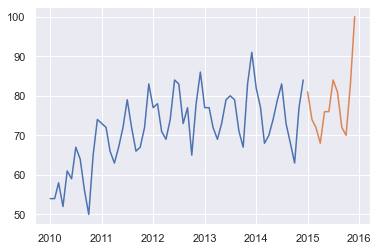

In [164]:
plt.plot(train_wine_pro)
plt.plot(test_wine_pro)

In [165]:
arima_model_w =  auto_arima(train_wine_pro,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=292.703, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=277.472, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=271.541, Time=0.20 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=275.961, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=273.533, Time=0.24 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=273.525, Time=0.30 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=272.845, Time=0.14 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.74 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=282.744, Time=0.13 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=273.407, Time=0.22 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=273.378, Time=0.23 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=274.667, Time=0.22 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=269.571, Time=0.90 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=279.371, Time=0.14 sec
 ARIMA(1,1,2)(1,1,1)[12]             

In [166]:
arima_model_w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   60
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -129.785
Date:                              Tue, 28 Mar 2023   AIC                            269.571
Time:                                      19:48:53   BIC                            278.822
Sample:                                  01-01-2010   HQIC                           273.052
                                       - 12-01-2014                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.009    109.155      0.000       0.982       1.018
ma.L1         -1.8363      1.376     -1.335      0.182      -4.532       0.860
ma.L2          0.8395      1.115      0.753      0.452      -1.346       3.025
ma.S.L12      -0.6619      0.349     -1.898      0.058      -1.345       0.021
sigma2        11.6165     18.025      0.644      0.519     -23.711      46.944
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                 1.48
Prob(Q):                              0.59   Prob(JB):                         0.48
Heteroskedasticity (H):               0.86   Skew:                             0.43
Prob(H) (two-sided):                  0.76   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [167]:
prediction_w = pd.DataFrame(arima_model_w.predict(n_periods = 12),index=test_wine_pro.index)
prediction_w.columns = ['predicted_interest']
prediction_w

predicted_interest
ds_pro                        
2015-01-01           75.400731
2015-02-01           72.856618
2015-03-01           66.142212
2015-04-01           63.917907
2015-05-01           67.810726
2015-06-01           72.306899
2015-07-01           74.737428
2015-08-01           67.226774
2015-09-01           61.751421
2015-10-01           55.640783
2015-11-01           68.079267
2015-12-01           75.397994

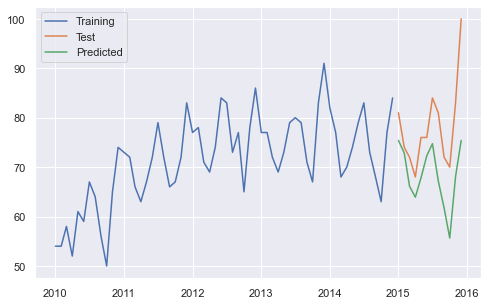

In [168]:
plt.figure(figsize=(8,5))
plt.plot(train_wine_pro,label="Training")
plt.plot(test_wine_pro,label="Test")
plt.plot(prediction_w,label="Predicted")
plt.legend(loc = 'upper left')
plt.show()

In [169]:
r2_score(test_wine_pro,prediction_w)

-0.9187166963871158

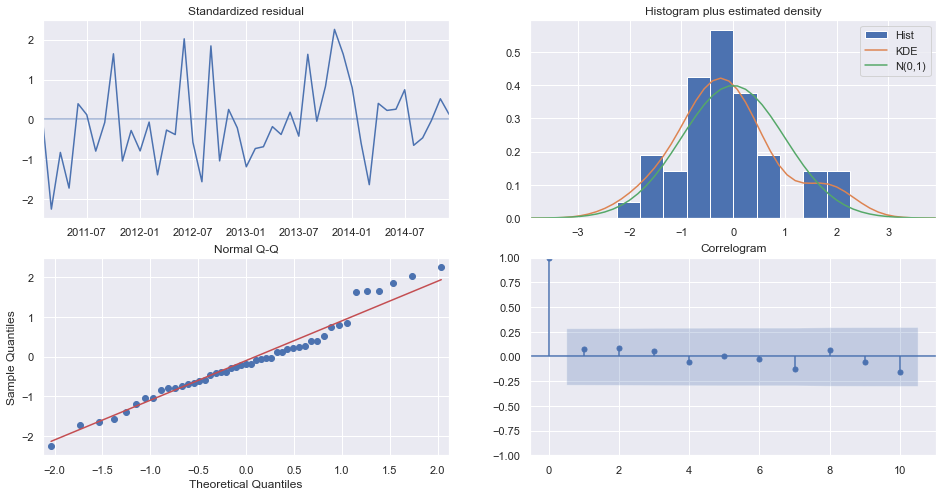

In [170]:
fig = arima_model_w.plot_diagnostics(figsize=(16,8))

In [171]:
print('Mean baseline MSE: ', mean_squared_error(pred['mean_baseline'], test_wine['y']))
print('Naive baseline MSE: ', mean_squared_error(pred['naive_baseline'], test_wine['y']))
print('Naive seasonal baseline MSE : ', mean_squared_error(pred['seasonal_naive_baseline'], test_wine['y']))
print('Drift baseline MSE: ', mean_squared_error(pred['drift_baseline'], test_wine['y']))
print('Prophet MSE: ', mean_squared_error(yhat_w, test_wine['y']))
print('Auto Arima Model :', mean_squared_error(prediction_w, test_wine_pro['y_pro']))

Mean baseline MSE:  1740.0233333333333
Naive baseline MSE:  191.41666666666666
Naive seasonal baseline MSE :  296.0
Drift baseline MSE:  188.58726851851853
Prophet MSE:  39.726411491842065
Auto Arima Model : 131.578662339047


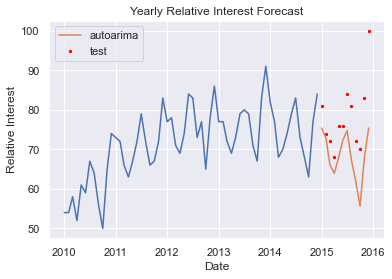

In [172]:
plt.plot(train_wine['ds'], train_wine['y'])
plt.plot(prediction_w, label = 'autoarima')
plt.scatter(test_wine['ds'], test_wine['y'], color = 'red', s = 5, label = 'test')
plt.title('Yearly Relative Interest Forecast')
plt.xlabel('Date')
plt.ylabel('Relative Interest')
plt.legend()
plt.show()

In [173]:
full_autoarima_model_w = arima_model_w.fit(df_wine_pro['y_pro'])
future = 12*1 
forecast, confidence_intervals = full_autoarima_model_w.predict(n_periods = future, return_conf_int = True)

In [174]:
final_date_w = df_wine['ds'][len(df_wine['ds']) - 1]
future_dates_w = pd.date_range("2016-1", periods = future, freq = 'MS')

C:\Users\SINA\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.



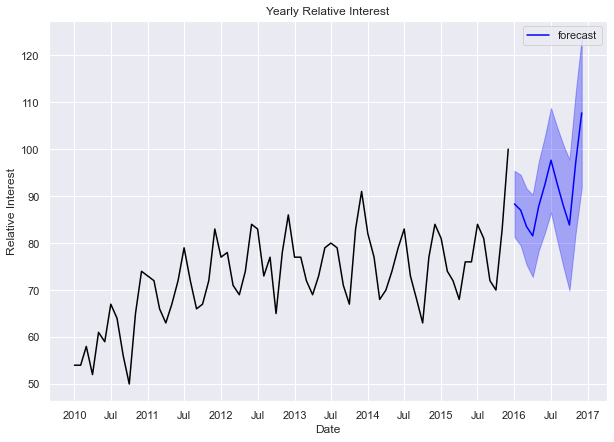

In [175]:
import matplotlib.dates as mdates
plt.figure(figsize = (10,7))
locator = mdates.AutoDateLocator(minticks = 10, maxticks = 15)
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator) 
plt.gca().xaxis.set_major_formatter(formatter)

plt.plot(df_wine['ds'], df_wine['y'], c = 'black')
plt.plot(future_dates_w, forecast, c = 'blue', label = 'forecast')
plt.fill_between(future_dates_w, confidence_intervals[:,0], confidence_intervals[:,1], color = 'blue', alpha = 0.3)
plt.title('Yearly Relative Interest')
plt.xlabel('Date')
plt.ylabel('Relative Interest')
plt.legend()
plt.show()

In [176]:
ex1.head()

month  available days  Cynthia Wright available hour  \
0      1              21                            168   
1      2              20                            160   
2      3              22                            176   
3      4              22                            176   
4      5              20                            160   

   Cynthia Wright actual hour  Stephanie Williams available hour  \
0                         160                                168   
1                         157                                160   
2                         177                                176   
3                         176                                176   
4                         174                                160   

   Stephanie Williams actual hour  Raj Dewan available hour  \
0                             159                       168   
1                             154                       160   
2                             173                       176   
3                             179                       176   
4                             172                       160   

   Raj Dewan actual hour  Chris Zhou available hour  Chris Zhou actual hour  \
0                    159                        168                     152   
1                    157                        160                     157   
2                    178                        176                     176   
3                    171                        176                     170   
4                    169                        160                     171   

   Nicola Mancini available hour  Nicola Mancini actual hour  
0                            168                         153  
1                            160                         155  
2                            176                         177  
3                            176                         170  
4                            160                         168

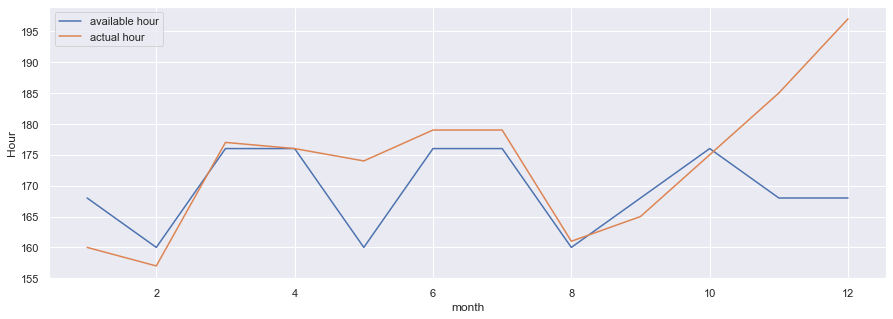

In [177]:
plt.figure(figsize = (15,5))
sns.lineplot(x = 'month', y = 'Cynthia Wright available hour', data = ex1, estimator = np.average,palette="husl", label="available hour")
sns.lineplot(x = 'month', y = 'Cynthia Wright actual hour', data = ex1, estimator = np.average ,palette="husl", label="actual hour")
plt.xlabel('month')
plt.ylabel('Hour')
plt.show()

NameError: name 'sn' is not defined

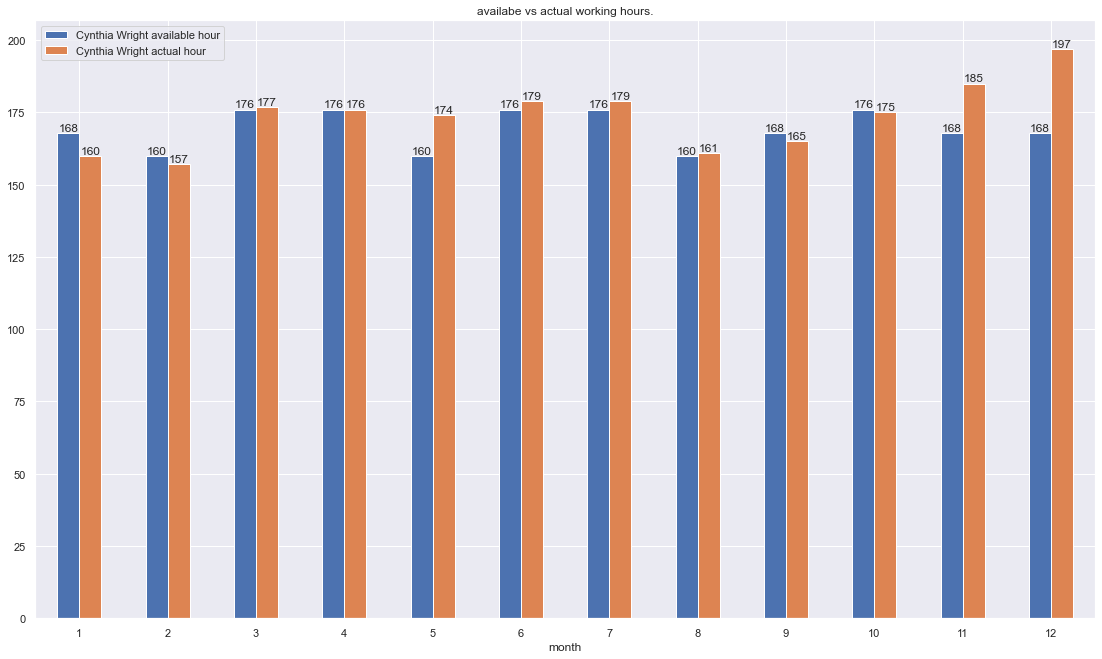

In [178]:
ax = ex1.iloc[:12,:].plot(x='month',y=['Cynthia Wright available hour','Cynthia Wright actual hour'],
                  kind='bar',figsize=(19,11),rot=0,title='availabe vs actual working hours.');
for i in ax.containers:
    ax.bar_label(i,)
sn.despine(top = True, left = True)
ax.set(yticklabels=[])
ax.tick_params(left=False)

In [ ]:
plt.figure(figsize = (15,5))
sns.lineplot(x = 'month', y = 'Stephanie Williams available hour', data = ex1, estimator = np.average,palette="husl", label="available hour")
sns.lineplot(x = 'month', y = 'Stephanie Williams actual hour', data = ex1, estimator = np.average ,palette="husl", label="actual hour")
plt.xlabel('month')
plt.ylabel('Hour')
plt.show()

In [ ]:
ax = ex1.iloc[:12,:].plot(x='month',y=['Stephanie Williams available hour','Stephanie Williams actual hour'],
                  kind='bar',figsize=(19,11),rot=0,title='availabe vs actual working hours.');
for i in ax.containers:
    ax.bar_label(i,)
sn.despine(top = True, left = True)
ax.set(yticklabels=[])
ax.tick_params(left=False)

In [ ]:
plt.figure(figsize = (15,5))
sns.lineplot(x = 'month', y = 'Raj Dewan available hour', data = ex1, estimator = np.average,palette="husl", label="available hour")
sns.lineplot(x = 'month', y = 'Raj Dewan actual hour', data = ex1, estimator = np.average ,palette="husl", label="actual hour")
plt.xlabel('month')
plt.ylabel('Hour')
plt.show()

In [ ]:
ax = ex1.iloc[:12,:].plot(x='month',y=['Raj Dewan available hour','Raj Dewan actual hour'],
                  kind='bar',figsize=(19,11),rot=0,title='availabe vs actual working hours.');
for i in ax.containers:
    ax.bar_label(i,)
sn.despine(top = True, left = True)
ax.set(yticklabels=[])
ax.tick_params(left=False)

In [ ]:
plt.figure(figsize = (15,5))
sns.lineplot(x = 'month', y = 'Chris Zhou available hour', data = ex1, estimator = np.average,palette="husl", label="available hour")
sns.lineplot(x = 'month', y = 'Chris Zhou actual hour', data = ex1, estimator = np.average ,palette="husl", label="actual hour")
plt.xlabel('month')
plt.ylabel('Hour')
plt.show()

In [ ]:
ax = ex1.iloc[:12,:].plot(x='month',y=['Chris Zhou available hour','Chris Zhou actual hour'],
                  kind='bar',figsize=(19,11),rot=0,title='availabe vs actual working hours.');
for i in ax.containers:
    ax.bar_label(i,)
sn.despine(top = True, left = True)
ax.set(yticklabels=[])
ax.tick_params(left=False)

In [ ]:
plt.figure(figsize = (15,5))
sns.lineplot(x = 'month', y = 'Nicola Mancini available hour', data = ex1, estimator = np.average,palette="husl", label="available hour")
sns.lineplot(x = 'month', y = 'Nicola Mancini actual hour', data = ex1, estimator = np.average ,palette="husl", label="actual hour")
plt.xlabel('month')
plt.ylabel('Hour')
plt.show()

In [ ]:
ax = ex1.iloc[:12,:].plot(x='month',y=['Nicola Mancini available hour','Nicola Mancini actual hour'],
                  kind='bar',figsize=(19,11),rot=0,title='availabe vs actual working hours.');
for i in ax.containers:
    ax.bar_label(i,)
sn.despine(top = True, left = True)
ax.set(yticklabels=[])
ax.tick_params(left=False)